In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('df.csv')

In [3]:
dataset.head()

,Unnamed: 0,Ratio1,Ratio2,Cities,Weight,Sex,Size,Class,Final
0,0,0.778647,1.447931,AL,0.593268,Male,0.186614,Junior,4
1,1,0.789195,0.253439,GA,0.364454,Female,0.724792,Senior,7
2,2,0.809848,-2.182158,KT,0.147445,Female,0.402979,Freshman,8
3,3,0.375377,0.966336,AL,0.770643,Female,0.724218,Junior,7
4,4,0.655383,0.070015,GA,0.013963,Male,0.498973,Senior,7


In [4]:
data_new = dataset[['Weight', 'Sex']]
data_new.head()

,Weight,Sex
0,0.593268,Male
1,0.364454,Female
2,0.147445,Female
3,0.770643,Female
4,0.013963,Male


In [5]:
data_new.describe()

,Weight
count,300.000000
mean,0.509387
std,0.296551
min,0.000817
25%,0.262364
50%,0.504960
75%,0.771203
max,0.994830


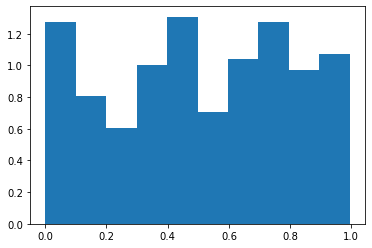

In [35]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.hist(data_new['Weight'], density = True)
plt.show()

C:\Users\Tagbo Aroh\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


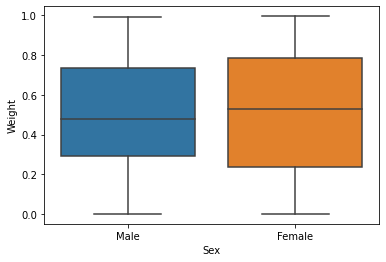

In [37]:
sn.boxplot('Sex','Weight', data = dataset)
plt.show()
#dataset[['Weight', 'Sex']]

C:\Users\Tagbo Aroh\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='Weight'>

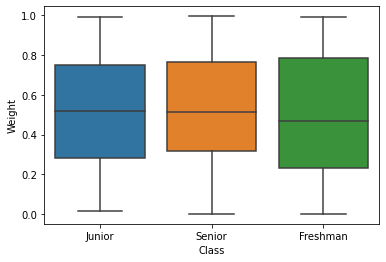

In [44]:
sn.boxplot('Class','Weight', data = dataset)

In [38]:
dataset['Sex'].value_counts()

Female    180
Male      120
Name: Sex, dtype: int64

In [39]:
M = dataset.loc[dataset['Sex']=='Male', 'Weight']
F = dataset.loc[dataset['Sex']=='Female', 'Weight']

In [43]:
import scipy.stats as stats



stats.ttest_ind(M, F, equal_var=False, alternative = 'greater')

Ttest_indResult(statistic=-0.4219191912096234, pvalue=0.6632886485906706)

In [8]:
dataset['Class'].value_counts()

Junior      100
Senior      100
Freshman    100
Name: Class, dtype: int64

In [24]:
import scipy.stats as stats
J = dataset.loc[dataset['Class']=='Junior', 'Weight']
S = dataset.loc[dataset['Class']=='Senior', 'Weight']
F = dataset.loc[dataset['Class']=='Freshman', 'Weight']

stats.levene(J, S, F, center='mean')

LeveneResult(statistic=0.472102395926903, pvalue=0.624156873309905)

In [25]:
from scipy.stats import normaltest
normaltest(J)

NormaltestResult(statistic=28.76229467929533, pvalue=5.67998340634498e-07)

In [45]:
from scipy.stats import f_oneway

f_oneway(J,S,F)

F_onewayResult(statistic=0.06665626871107622, pvalue=0.935527735254003)

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Weight ~ C(Class) + C(Sex) + C(Class):C(Sex)', data=dataset).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Class),0.032260,2.0,0.181643,0.833992
C(Sex),0.015243,1.0,0.171660,0.678943
C(Class):C(Sex),0.140228,2.0,0.789575,0.454998
Residual,26.107153,294.0,NaN,NaN


## P- Values


In [28]:
import scipy.stats as stats


stats.t.sf(abs(1.87), df=24)



0.036865328383323424

In [29]:
stats.norm.sf(abs(-0.77))

0.22064994634264962

In [30]:
stats.norm.ppf(.95)

1.6448536269514722

In [33]:
stats.norm.ppf(0.975)

1.959963984540054